In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [56]:
overdoses = pd.read_excel('overdose_data_1999-2015.xls',sheetname='Online',skiprows =6)

def get_data(table,rownum,title):
    data = pd.DataFrame(table.loc[rownum][2:]).astype(float)
    data.columns = {title}
    return data

/home/rajib/anaconda3/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [57]:
%matplotlib notebook
title = 'Heroin Overdoses'
d = get_data(overdoses,18,title)
x = np.array(d.index)
y = np.array(d['Heroin Overdoses'])
overdose = pd.DataFrame(y,x)
#XN,YN = augment(x,y,10)
#augmented = pd.DataFrame(YN,XN)
overdose.columns = {title}

Traceback (most recent call last):
  File "/home/rajib/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/home/rajib/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/home/rajib/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1560, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [58]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

<IPython.core.display.Javascript object>


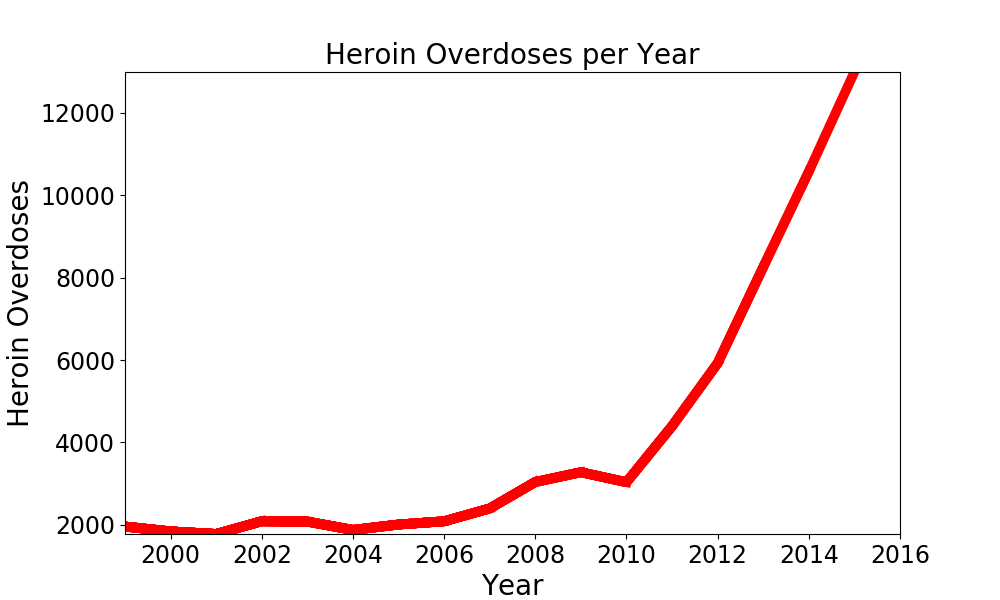

Text(0.5,1,'Heroin Overdoses per Year')

In [59]:
fig = plt.figure(figsize=(10,6))
plt.xlim(1999, 2016)
plt.ylim(np.min(overdose)[0], np.max(overdose)[0])
plt.xlabel('Year',fontsize=20)
plt.ylabel(title,fontsize=20)
plt.title('Heroin Overdoses per Year',fontsize=20)

In [60]:
def animate(i):
    data = overdose.iloc[:int(i+1)] #select data range
    p = sns.lineplot(x=data.index, y=data[title], data=data, color="r")
    p.tick_params(labelsize=17)
    plt.setp(p.lines,linewidth=7)

In [61]:
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=17, repeat=True)

In [62]:
ani.save('HeroinOverdosesJumpy.mp4', writer=writer)

<IPython.core.display.Javascript object>


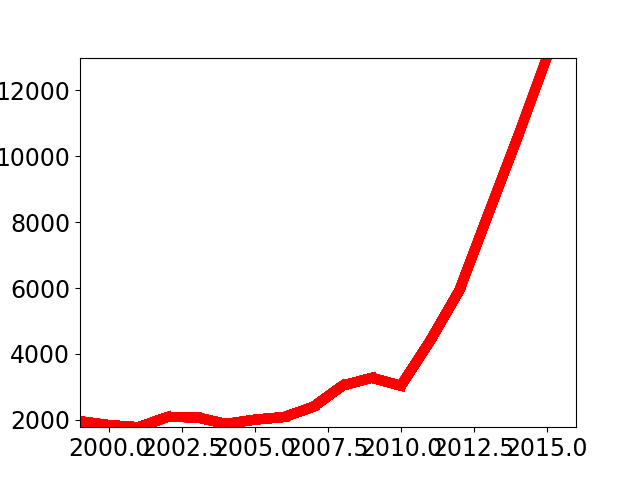

In [63]:
fig, ax = plt.subplots()

ax.set_xlim((1999, 2016))
ax.set_ylim((np.min(overdose)[0], np.max(overdose)[0]))

line, = ax.plot([], [], lw=2)

In [64]:
def init():
    line.set_data([], [])
    return (line,)

In [66]:
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=17,repeat=True)

In [67]:
anim.save('animation.gif', writer='imagemagick')